# XPECTO Epidemic 2.0: Practice Playground

This notebook provides a simplified environment for testing your epidemic intervention strategies. All attempts in this notebook are in practice mode and will not count toward your official competition score.

## Setup

First, let's set up our environment and import the necessary modules.

In [1]:
# Add the project root to the path
import sys
import os
from pathlib import Path

# Add parent directory to path for imports
sys.path.append(str(Path.cwd().parent))

# Import required modules
from src.competition import CompetitionManager
from src.competition.testing.enhanced_engine import EnhancedEngine as Engine

# Import visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.competition.utils as utils

# Set up visualization
plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)

Testing mode enabled: EngineV1 replaced with MockEngine


## Initialize Competition System

Now, let's initialize the competition system and register as a player.

In [2]:
# Create an epidemic engine
engine = Engine()

# Create competition manager with a practice data directory
competition = CompetitionManager(data_dir="practice_data", engine=engine)

# Register as a player - use your real name for consistent tracking
player_name = "Your Name"  # Change this to your name
player_id = competition.setup_player(name=player_name)
print(f"Registered as player: {player_name} (ID: {player_id})")

# Ensure we're in practice mode
competition.toggle_practice_mode(is_practice=True)
print("Practice mode enabled - attempts will not count for competition")

Player registered: Your Name (ID: b1bd39bf-42ef-4ca4-b91d-04c03755020d)
Registered as player: Your Name (ID: b1bd39bf-42ef-4ca4-b91d-04c03755020d)
Mode set to: Practice
Practice mode enabled - attempts will not count for competition


## Available Scenarios

Let's check what scenarios are available for us to test.

In [3]:
# List available scenarios
competition.list_available_scenarios()

,ID,Name,Difficulty,R0,Resources
0,standard,Standard Outbreak,standard,2.5,1000
1,challenging,Challenging Outbreak,challenging,3.5,700


[{'id': 'standard',
  'name': 'Standard Outbreak',
  'description': 'A standard epidemic outbreak scenario with normal parameters.',
  'seed': 'standard_2023',
  'r0': 2.5,
  'initial_infections': {'capital': 100},
  'initial_resources': 1000,
  'difficulty': 'standard',
  'parameters': {'disease_mortality': 0.02,
   'treatment_effectiveness': 0.7,
   'vaccine_development_time': 120,
   'economic_impact_factor': 1.0}},
 {'id': 'challenging',
  'name': 'Challenging Outbreak',
  'description': 'A more difficult scenario with multiple infection sites and higher R0.',
  'seed': 'challenging_2023',
  'r0': 3.5,
  'initial_infections': {'capital': 50,
   'major_city_1': 30,
   'major_city_2': 20},
  'initial_resources': 700,
  'difficulty': 'challenging',
  'parameters': {'disease_mortality': 0.03,
   'treatment_effectiveness': 0.6,
   'vaccine_development_time': 150,
   'economic_impact_factor': 1.2}}]

## Select a Scenario

Choose a scenario to work with. You can modify this cell to select different scenarios.

In [4]:
# Select the scenario to use
scenario_id = "standard"  # Options: "standard", "challenging", etc.
competition.set_scenario(scenario_id)
competition.display_scenario_details()

Current scenario set to: Standard Outbreak (standard)


## Define Your Strategy

This is where you'll define your intervention strategy. You can modify this cell to experiment with different approaches.

In [5]:
# Define your intervention strategy here
def my_strategy(engine):
    """
    My custom epidemic intervention strategy.
    
    This is a template strategy - modify it to implement your approach!
    """
    # Initial setup - moderate measures
    engine.set_lockdown_level(0.5)  # 50% lockdown severity
    engine.allocate_resources('healthcare', 200)  # Allocate resources to healthcare
    
    # Define a callback for dynamic response
    def monitor_and_respond(step, state):
        # Calculate current infection rate
        infection_rate = state.population.infected / state.population.total
        
        # Use current_gdp instead of gdp
        economic_health = state.economy.current_gdp / state.economy.initial_gdp
        
        # Early phase - containment focus
        if step < 50:
            if infection_rate > 0.05:  # If infection rate rises early
                engine.set_lockdown_level(0.7)  # Increase restrictions
                engine.allocate_resources('healthcare', 300)  # Boost healthcare
            else:
                engine.set_lockdown_level(0.4)  # Moderate restrictions
                engine.allocate_resources('healthcare', 150)  # Moderate healthcare
                
        # Middle phase (50-200) - targeted response
        elif 50 <= step < 200:
            if infection_rate > 0.1:  # High infection rate
                engine.set_lockdown_level(0.8)  # Strong lockdown
                engine.allocate_resources('healthcare', 350)  # Major healthcare
            elif infection_rate > 0.05:  # Moderate infection rate
                engine.set_lockdown_level(0.6)  # Significant restrictions
                engine.allocate_resources('healthcare', 250)  # Enhanced healthcare
                engine.allocate_resources('economic', 100)  # Some economic support
            else:  # Low infection rate
                engine.set_lockdown_level(0.3)  # Reduced restrictions 
                engine.allocate_resources('healthcare', 150)  # Maintain healthcare
                engine.allocate_resources('economic', 200)  # Focus on economy
                
        # Late phase (200+) - recovery focus if controlled
        else:
            if infection_rate < 0.01:  # Very low infection rate
                engine.set_lockdown_level(0.2)  # Minimal restrictions
                engine.allocate_resources('economic', 300)  # Economic recovery
                engine.allocate_resources('healthcare', 100)  # Maintenance healthcare
            elif infection_rate < 0.05:  # Low infection rate
                engine.set_lockdown_level(0.4)  # Moderate restrictions
                engine.allocate_resources('economic', 200)  # Economic support
                engine.allocate_resources('healthcare', 150)  # Moderate healthcare
            else:  # Still significant infection
                engine.set_lockdown_level(0.6)  # Maintain restrictions
                engine.allocate_resources('healthcare', 250)  # Prioritize healthcare
                engine.allocate_resources('economic', 150)  # Some economic support
    
    # Register the callback
    engine.register_step_callback(monitor_and_respond)

## Run the Simulation

Now let's run the simulation with your strategy.

In [6]:
# Set up the simulation
competition.setup_simulation()

# Run the simulation with your strategy
results = competition.run_simulation(
    steps=365,  # Simulate for 1 year (you can change this)
    interventions=[my_strategy]  # Specify which strategy to use
)

# Display the results
print(f"\nResults for {scenario_id} scenario using 'my_strategy':")
competition.display_score(results)

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.39 (base: 2.5)
  - Initial infections: 102 across regions (base: 100)
  - Resources: 1007 (base: 1000)
Simulation configured for scenario: Standard Outbreak

=== Active Disease Variants ===
Gamma Variant:
  Prevalence: 100.0%
  Transmissibility: 1.7x base
  Severity: 1.2x base
  Immune Escape: 50.0%

Alpha Variant:
  Prevalence: 100.0%
  Transmissibility: 1.5x base
  Severity: 1.1x base
  Immune Escape: 10.0%

Beta Variant:
  Prevalence: 75.8%
  Transmissibility: 1.3x base
  Severity: 1.3x base
  Immune Escape: 30.0%


=== Strategy Performance Analysis ===
Score: 0.0000   (Raw: 0.0065)
Grade: F

Key Performance Indicators:
  Population Survival: 0.0%
  Economic Preservation: 5.6%
  Infection Control: 0.0%
  Multi-Objective Balance: 0.000

Variants: Gamma, Alpha, Beta (peak: 100.0%)
Variant Response Rating: 0.06

Strategy Rating: Critical Failure
Strategy Archetype: Healthcare-Focused
Resource Distribution: Health

## Compare Multiple Strategies

Let's compare different strategies to see which performs best.

In [7]:
# List of strategies to compare
strategies = [
    ("Custom Strategy", my_strategy),
    ("Aggressive Lockdown", utils.aggressive_containment),
    ("Economy Focused", utils.economic_focus)
]

# Dictionary to store results
all_results = {}

# Run each strategy
for name, strategy in strategies:
    # Reset simulation
    competition.setup_simulation()
    
    # Run with this strategy
    print(f"\nRunning simulation with strategy: {name}")
    result = competition.run_simulation(steps=365, interventions=[strategy])
    
    # Store results
    all_results[name] = {
        'Population Survived': result.get('population_survived', 0),
    'GDP Preserved': result.get('gdp_preserved', 0),
    'Infection Control': result.get('infection_control', 0),
    'Resource Efficiency': result.get('resource_efficiency', 0),
    'Time to Containment': result.get('time_to_containment', 0),
    'Final Score': result.get('final_score', 0)
    }
    
    # Display individual score
    competition.display_score(result)

# Create comparison dataframe
comparison_df = pd.DataFrame(all_results)

# Display comparison table
print("\n=== Strategy Comparison ===\n")
display(comparison_df)

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.39 (base: 2.5)
  - Initial infections: 102 across regions (base: 100)
  - Resources: 1007 (base: 1000)
Simulation configured for scenario: Standard Outbreak

Running simulation with strategy: Custom Strategy

=== Active Disease Variants ===
Gamma Variant:
  Prevalence: 100.0%
  Transmissibility: 1.7x base
  Severity: 1.2x base
  Immune Escape: 50.0%

Alpha Variant:
  Prevalence: 100.0%
  Transmissibility: 1.5x base
  Severity: 1.1x base
  Immune Escape: 10.0%

Beta Variant:
  Prevalence: 100.0%
  Transmissibility: 1.3x base
  Severity: 1.3x base
  Immune Escape: 30.0%


=== Strategy Performance Analysis ===
Score: 0.0000   (Raw: 0.0006)
Grade: F

Key Performance Indicators:
  Population Survival: 0.0%
  Economic Preservation: 1.6%
  Infection Control: 0.0%
  Multi-Objective Balance: 0.000

Variants: Gamma, Alpha, Beta (peak: 100.0%)
Variant Response Rating: 0.00

Strategy Rating: Critical Failure
Strategy Archety

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.39 (base: 2.5)
  - Initial infections: 102 across regions (base: 100)
  - Resources: 1007 (base: 1000)
Simulation configured for scenario: Standard Outbreak

Running simulation with strategy: Aggressive Lockdown

=== Active Disease Variants ===
Gamma Variant:
  Prevalence: 100.0%
  Transmissibility: 1.7x base
  Severity: 1.2x base
  Immune Escape: 50.0%

Alpha Variant:
  Prevalence: 100.0%
  Transmissibility: 1.5x base
  Severity: 1.1x base
  Immune Escape: 10.0%

Beta Variant:
  Prevalence: 100.0%
  Transmissibility: 1.3x base
  Severity: 1.3x base
  Immune Escape: 30.0%


=== Strategy Performance Analysis ===
Score: 0.0000   (Raw: 0.0002)
Grade: F

Key Performance Indicators:
  Population Survival: 0.0%
  Economic Preservation: 0.9%
  Infection Control: 0.0%
  Multi-Objective Balance: 0.000

Variants: Gamma, Alpha, Beta (peak: 100.0%)
Variant Response Rating: 0.00

Strategy Rating: Critical Failure
Strategy Arc

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.39 (base: 2.5)
  - Initial infections: 102 across regions (base: 100)
  - Resources: 1007 (base: 1000)
Simulation configured for scenario: Standard Outbreak

Running simulation with strategy: Economy Focused

=== Active Disease Variants ===
Gamma Variant:
  Prevalence: 100.0%
  Transmissibility: 1.7x base
  Severity: 1.2x base
  Immune Escape: 50.0%

Alpha Variant:
  Prevalence: 100.0%
  Transmissibility: 1.5x base
  Severity: 1.1x base
  Immune Escape: 10.0%

Beta Variant:
  Prevalence: 100.0%
  Transmissibility: 1.3x base
  Severity: 1.3x base
  Immune Escape: 30.0%


=== Strategy Performance Analysis ===
Score: 0.0000   (Raw: 0.0001)
Grade: F

Key Performance Indicators:
  Population Survival: 0.0%
  Economic Preservation: 0.4%
  Infection Control: 0.0%
  Multi-Objective Balance: 0.000

Variants: Gamma, Alpha, Beta (peak: 100.0%)
Variant Response Rating: 0.00

Strategy Rating: Critical Failure
Strategy Archety


=== Strategy Comparison ===



,Custom Strategy,Aggressive Lockdown,Economy Focused
Population Survived,0.000000,0.000000,0.000000
GDP Preserved,0.146632,0.284644,0.191534
Infection Control,0.591861,0.584895,0.594901
Resource Efficiency,0.295930,0.292447,0.297450
Time to Containment,0.000000,0.000000,0.000000
Final Score,0.192100,0.217800,0.201900


## Visualize Strategy Comparison

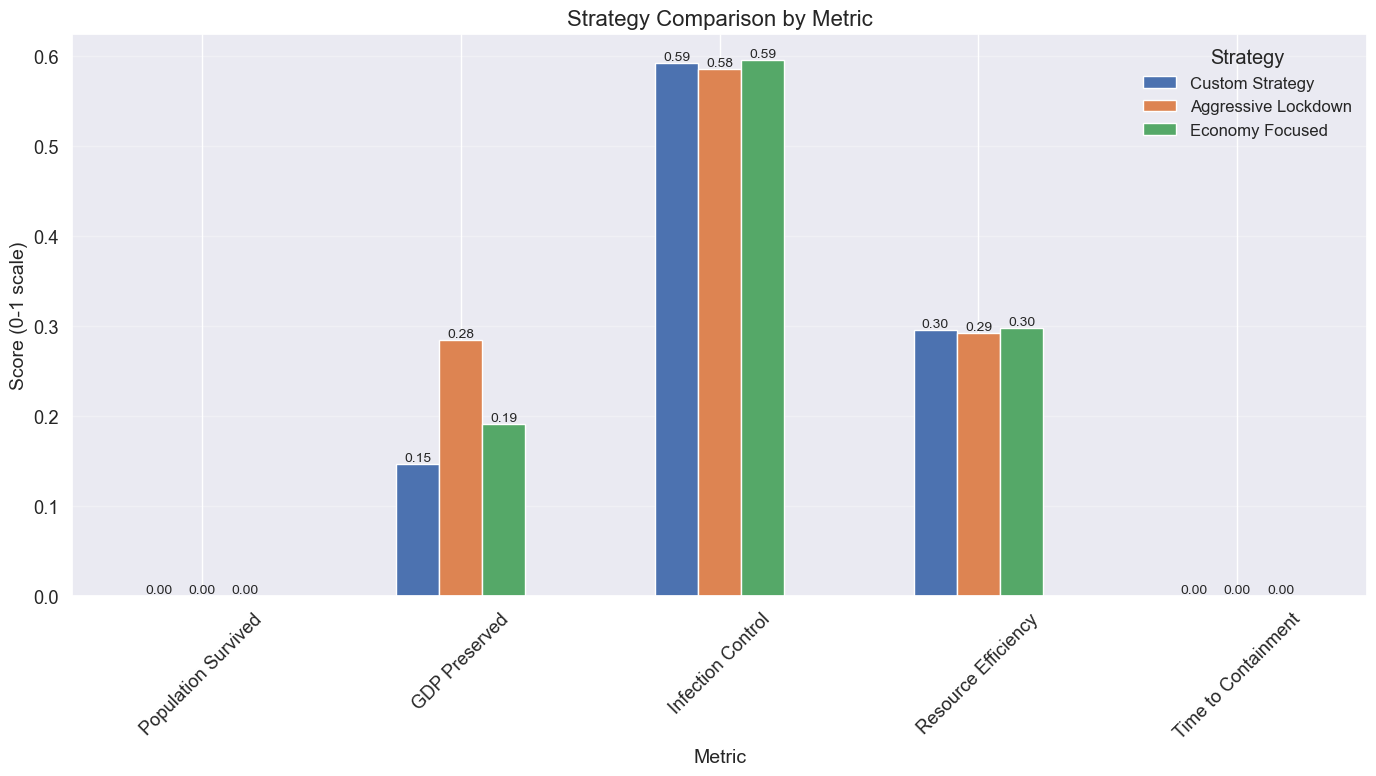

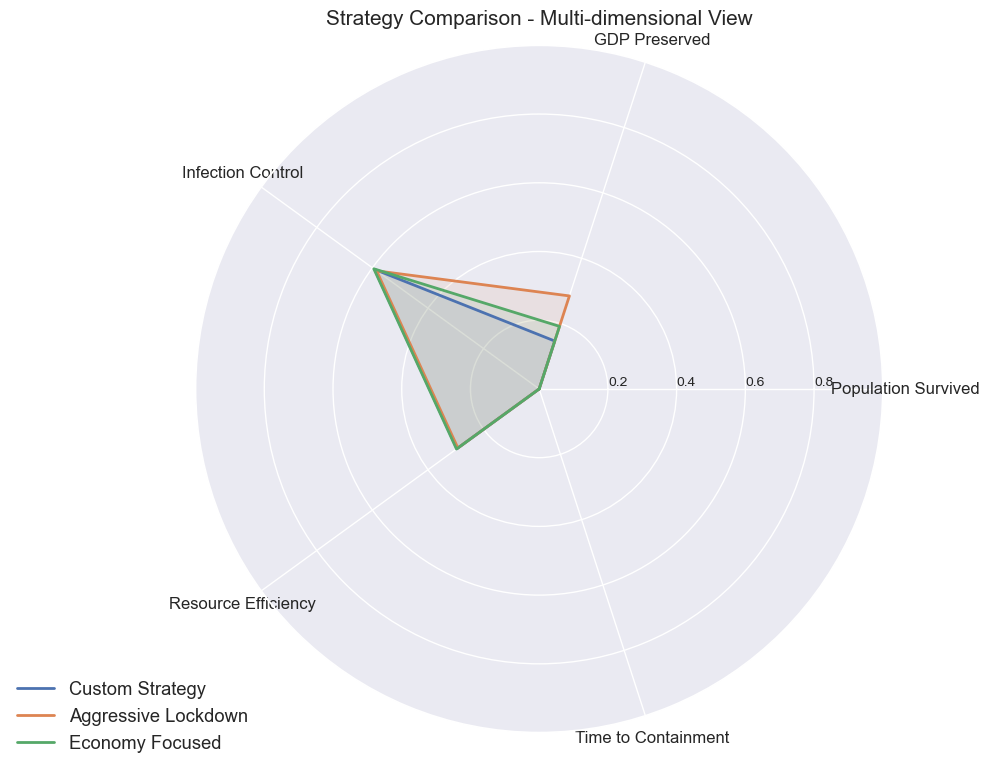

In [8]:
# Visualize the comparison (excluding final score)
metrics_df = comparison_df.drop('Final Score')

# Create bar chart
ax = metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Strategy Comparison by Metric', fontsize=16)
plt.ylabel('Score (0-1 scale)', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Strategy', fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()

# Create a radar chart for multi-dimensional comparison
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Prepare data for radar chart
categories = metrics_df.index.tolist()
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Draw one line per strategy
for strategy in metrics_df.columns:
    values = metrics_df[strategy].values.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, linewidth=2, label=strategy)
    ax.fill(angles, values, alpha=0.1)

# Set category labels
plt.xticks(angles[:-1], categories, size=12)

# Draw y-axis lines and labels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], size=10)
plt.ylim(0, 1)

# Add title and legend
plt.title('Strategy Comparison - Multi-dimensional View', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

## View Attempt History

Let's see all our practice attempts to track our progress.

In [9]:
# Display all your practice attempts
competition.display_player_attempts()

,Timestamp,Scenario,Official,Score,Pop. Survived,GDP,Infection Control,Resources,Containment
0,2025-03-30 15:51,standard,No,0.2019,0.00,0.19,0.59,0.30,0.00
1,2025-03-30 15:51,standard,No,0.1921,0.00,0.15,0.59,0.30,0.00
2,2025-03-30 15:51,standard,No,0.2178,0.00,0.28,0.58,0.29,0.00
3,2025-03-30 15:51,standard,No,0.2941,0.00,0.03,0.57,0.28,0.88


## Strategy Notes

Use this cell to keep notes about your strategies and observations.

In [10]:
strategy_notes = """
Strategy Name: My Custom Strategy

Key Approach:
- Dynamic response based on infection rate and simulation phase
- Strong early response to prevent initial spread
- Economic recovery focus once infections are under control

Observations:
- Strategy performs well in containing the infection
- GDP preservation could be improved
- Resource efficiency needs optimization

Ideas for Improvement:
- Fine-tune thresholds for different phases
- Better balance between healthcare and economic resources
- More gradual transitions between lockdown levels
"""

print(strategy_notes)


Strategy Name: My Custom Strategy

Key Approach:
- Dynamic response based on infection rate and simulation phase
- Strong early response to prevent initial spread
- Economic recovery focus once infections are under control

Observations:
- Strategy performs well in containing the infection
- GDP preservation could be improved
- Resource efficiency needs optimization

Ideas for Improvement:
- Fine-tune thresholds for different phases
- Better balance between healthcare and economic resources
- More gradual transitions between lockdown levels



## Next Steps

Once you're satisfied with your strategy in the practice environment:

1. Refine your approach based on the results
2. Test against different scenarios to ensure robustness
3. When ready, use the Competition Playground notebook to make official attempts

Remember that you're limited to 3 official attempts per scenario, so make them count!

## Clean Up Data

If you want to remove your practice data and start fresh, uncomment and run the following cell:

In [11]:
# import shutil
# shutil.rmtree("practice_data", ignore_errors=True)
# print("Practice data removed. Restart the notebook to create new data.")